# Chapter 4: Machine Learning state of the art
## Figure 4.1
Visualize Google trends data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

In [2]:
google_trend = pd.read_csv('../data/MLDS_multiTimeline.csv', header=0, skiprows=2, index_col=0)
n_samples = google_trend.shape[0]
google_trend.head()

,data science: (Worldwide),machine learning: (Worldwide)
Week,,
2012-09-23,11,18
2012-09-30,10,16
2012-10-07,9,17
2012-10-14,9,17
2012-10-21,8,17


Numbers represent search interest relative to the highest point 
on the chart for the given region and time. A value of 100 is the 
peak popularity for the term. A value of 50 means that the term is 
half as popular. Likewise a score of 0 means the term was less than 
1% as popular as the peak.


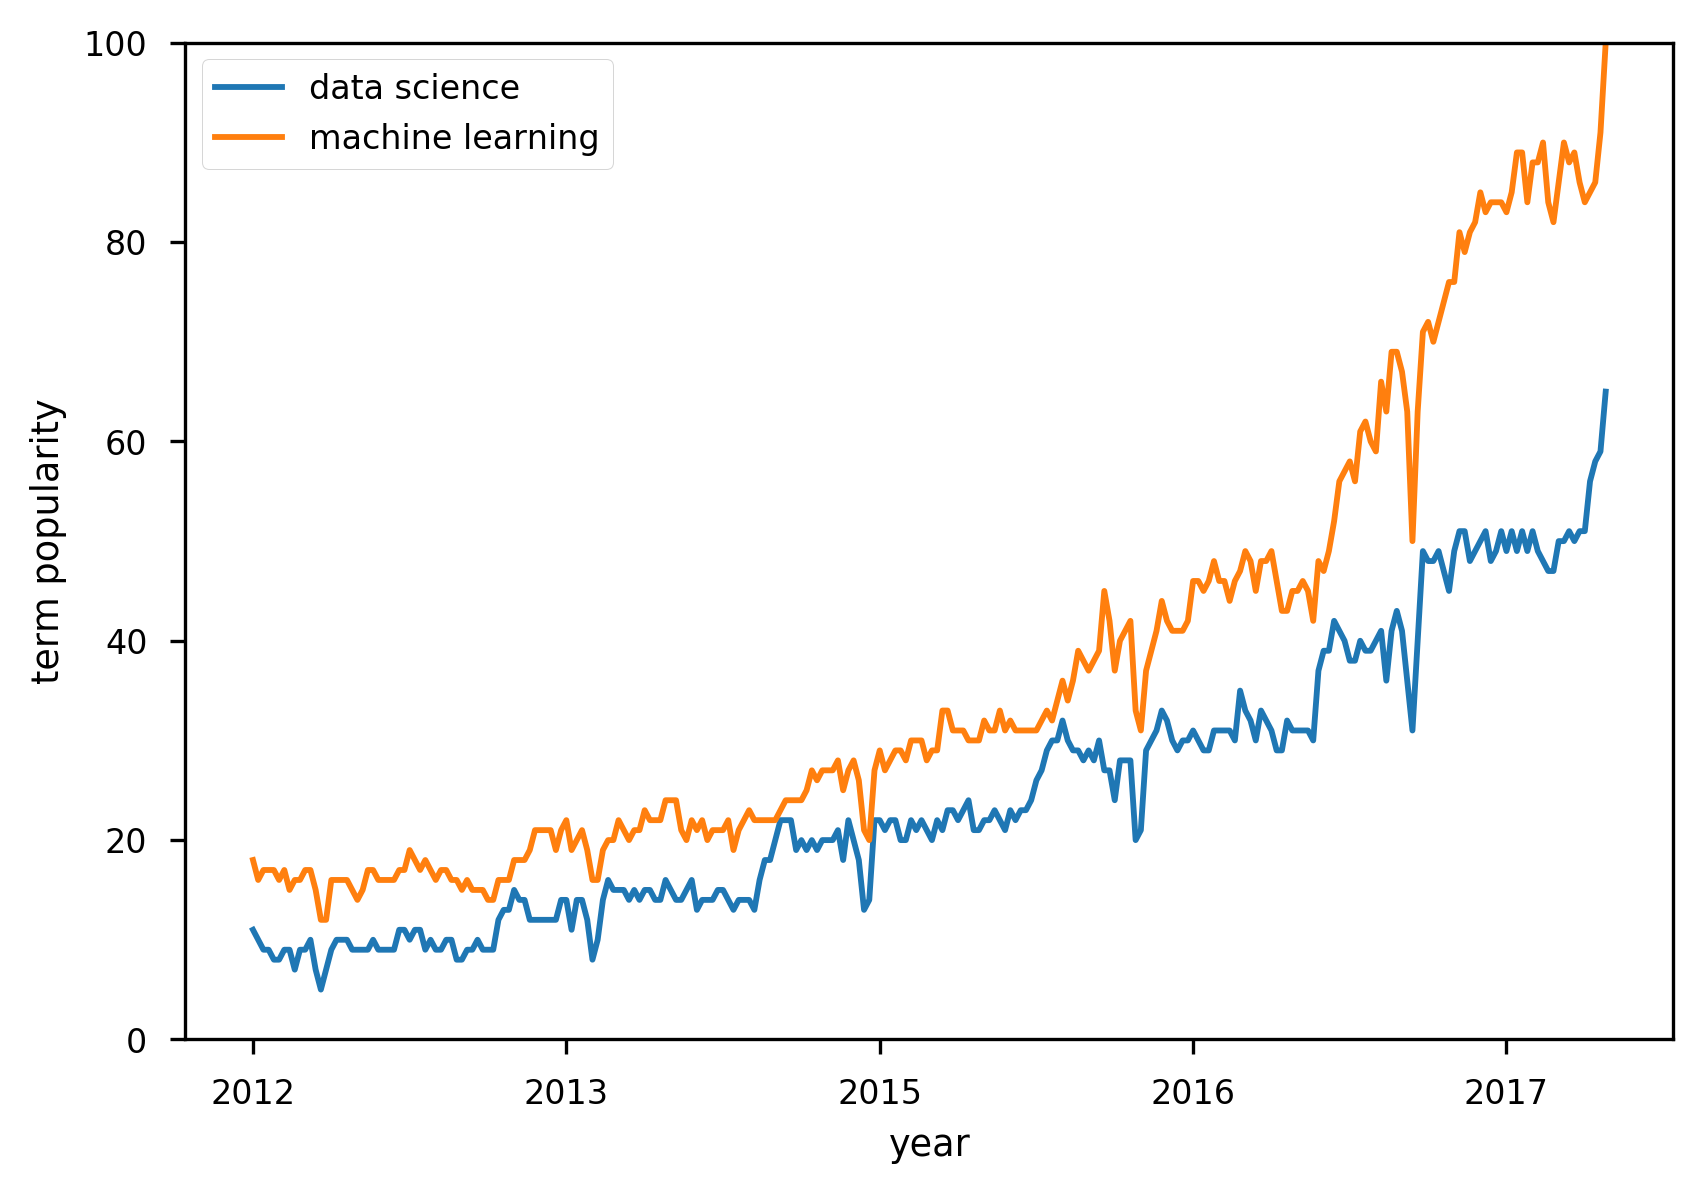

In [3]:
plt.figure(dpi=300)

# plt.fill_between(np.arange(n_samples), 0, google_trend.values[:,0].ravel())
# plt.fill_between(np.arange(n_samples), 0, google_trend.values[:,1].ravel())

for i in [0,1]:
    plt.plot(np.arange(n_samples), google_trend.values[:,i].ravel(),
             label=google_trend.columns[i].split(':')[0])

step = 60
xaxis = [s.split('-')[0] for s in google_trend.index[0:n_samples:step]]
plt.xticks(np.arange(0, n_samples, step), xaxis, rotation=0)
plt.ylim([0,100])
plt.xlabel('year');
plt.ylabel('term popularity')
plt.legend()
plt.savefig('../images/google_trends_MLDS.png')

print("Numbers represent search interest relative to the highest point \n"
      "on the chart for the given region and time. A value of 100 is the \n"
      "peak popularity for the term. A value of 50 means that the term is \n"
      "half as popular. Likewise a score of 0 means the term was less than \n"
      "1% as popular as the peak.")

# Exponential fitting

Fit an exponential $ y=a \cdot e^{-cx}+d $ on the two trends.

[ 7.42873308 -0.00775247  0.75868308]
[[  7.49187052e-01   3.41945053e-04  -1.01644848e+00]
 [  3.41945053e-04   1.57794128e-07  -4.56913412e-04]
 [ -1.01644848e+00  -4.56913412e-04   1.43447691e+00]]
---------------------
[  3.07752708  -0.01285099  12.23834   ]
[[  8.32323967e-02   1.03566355e-04  -1.80579914e-01]
 [  1.03566355e-04   1.30252897e-07  -2.18090608e-04]
 [ -1.80579914e-01  -2.18090608e-04   4.69395429e-01]]
---------------------


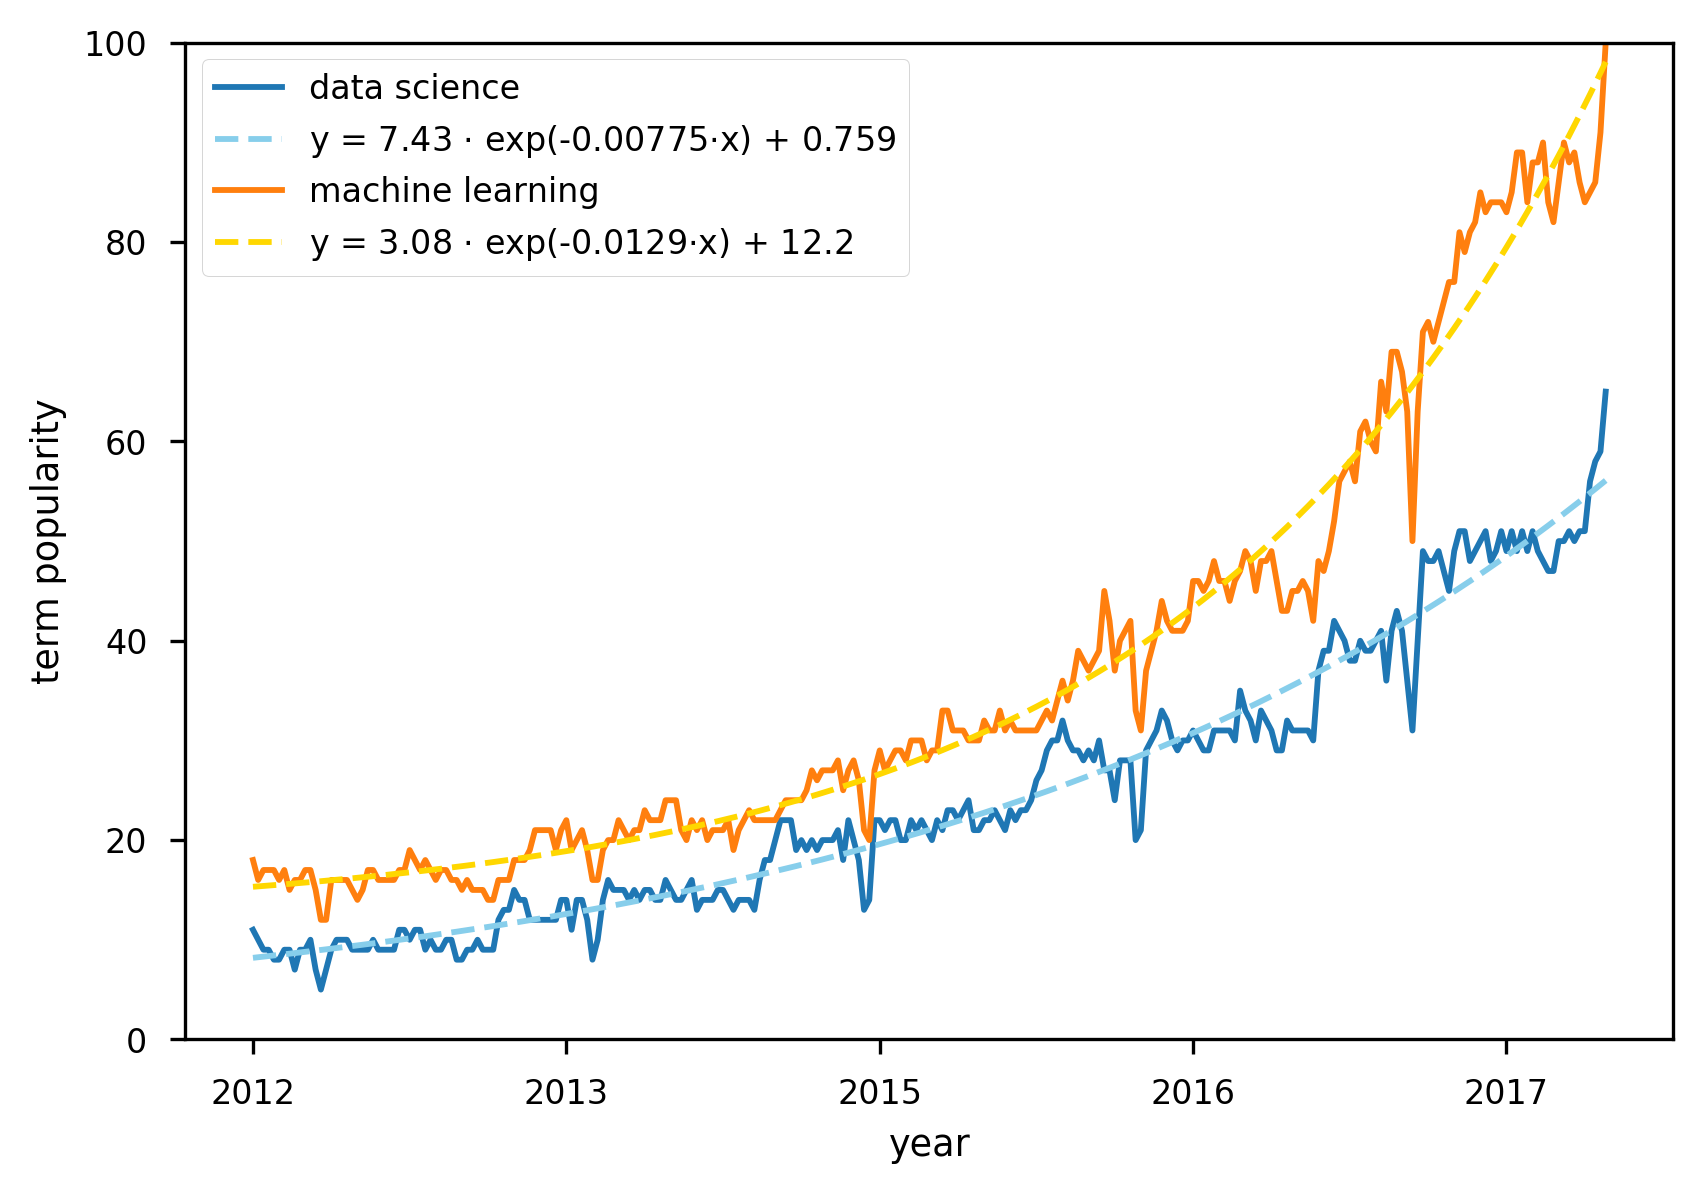

In [4]:
from scipy import optimize as opt

x = np.arange(n_samples)

def f(t, a, c, d):
    return a*np.exp(-c*t)+d

params = {}
cov = {}
for i in [0,1]:
    y = google_trend.values[:,i].ravel()
    params[i], cov[i] = opt.curve_fit(f,  x,  y, p0 = (1, 1e-6, 1))
    print(params[i])
    print(cov[i])
    print('---------------------')

colors = {0: ['C0', 'skyblue'],
          1:['C1', 'gold']}

plt.figure(dpi=300)
for i in [0,1]:
    plt.plot(x, google_trend.values[:,i].ravel(),  color=colors[i][0],
             label=google_trend.columns[i].split(':')[0]) # google data
    
    plt.plot(x, f(x, *params[i]), '--', color=colors[i][1],
             label=r"y = {:2.3} $\cdot$ exp({:2.3}$\cdot$x) + {:2.3}".format(*params[i])) # exponential fitting

step = 60
xaxis = [s.split('-')[0] for s in google_trend.index[0:n_samples:step]]
plt.xticks(np.arange(0, n_samples, step), xaxis, rotation=0)
plt.ylim([0,100])
plt.xlabel('year');
plt.ylabel('term popularity')
plt.legend()
plt.savefig('../images/google_trends_MLDS_fit.png');
